<p align="center">
  <a href="url"><img src="https://raw.githubusercontent.com/mymehio/test/master/ml4co-final.png" align="middle" height="350" width="600" ></a>
</p>

#An Image Classifier using Fully-Connected and Convolutional Neural Networks


In this project, you will train a **fully-connected neural network** to perform image classification on dandelions and grass plants, and you will do the same task bu this time using a **convolutional neural network**, and then compare between their performances. 
You will be using TensorFlow/Keras to build these models training/validation dataset.

First, let's download the training and validation data:

### Preparing the Datasets

In [ ]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2022-12-09 08:45:02--  https://github.com/mymehio/test/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/master/train.zip [following]
--2022-12-09 08:45:02--  https://github.com/mymehio/test/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/master/train.zip [following]
--2022-12-09 08:45:02--  https://raw.githubusercontent.com/mymehio/test/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12649816 (12M) [application/zip]


In [ ]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2022-12-09 08:45:02--  https://github.com/mymehio/test/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/master/valid.zip [following]
--2022-12-09 08:45:02--  https://github.com/mymehio/test/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/master/valid.zip [following]
--2022-12-09 08:45:02--  https://raw.githubusercontent.com/mymehio/test/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4853088 (4.6M) [application/zip]


The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [ ]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

The contents of the .zip are extracted to the directory `/tmp/train`, which in turn each contain `dandelion` and `grass` subdirectories.

### If the data is so small ==> Data Augmentation 

What you'll see later on is that you will use the [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to automatically make our dataset ready from this train directory, using the subdirectories for classes.

Let's define each of these subdirectories:

In [ ]:
# Directory with our training dandelion images
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass images
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion images
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass images
valid_grass_dir = os.path.join('/tmp/valid/grass')

Now, let's see what the filenames look like in the `dandelion` and `grass` training directories:

In [ ]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000170.jpg', '00000408.jpg', '00000100.jpg', '00000131.jpg', '00000195.jpg', '00000296.jpg', '00000133.jpg', '00000498.jpg', '00000090.jpg', '00000096.jpg']
['00000170.jpg', '00000408.jpg', '00000100.jpg', '00000131.jpg', '00000195.jpg', '00000296.jpg', '00000133.jpg', '00000498.jpg', '00000090.jpg', '00000096.jpg']
['00000090.jpg', '00000040.jpg', '00000050.jpg', '00000060.jpg', '00000075.jpg', '00000058.jpg', '00000024.jpg', '00000020.jpg', '00000080.jpg', '00000056.jpg']
['00000040.jpg', '00000050.jpg', '00000060.jpg', '00000058.jpg', '00000024.jpg', '00000020.jpg', '00000056.jpg', '00000015.jpg', '00000055.jpg', '00000049.jpg']


Let's find out the total number of dandelion and grass images in the directories:

In [ ]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training grass images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation grass images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training grass images: 499
total validation dandelion images: 92
total validation grass images: 56


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

**Exercise:**

Display a batch of 8 dandelion and 8 grass images, and their corresponding class names. 
Try to complete the cell to get the code running


You can rerun the cell to see a fresh batch each time:

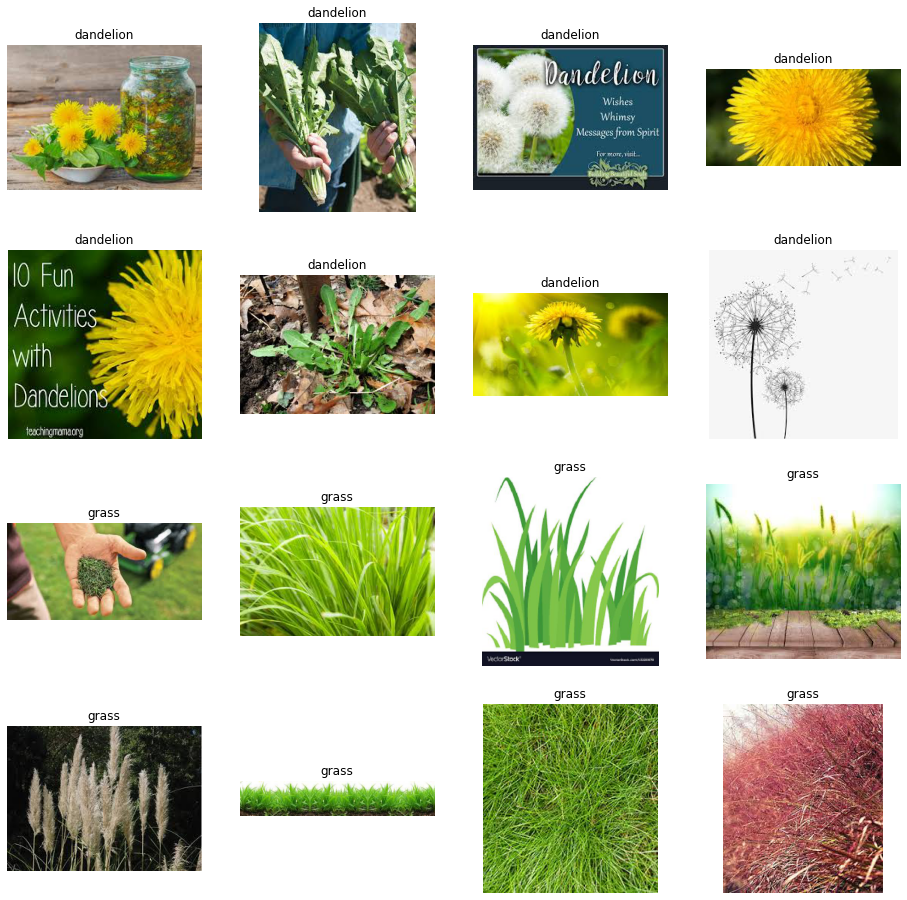

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname) 
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path) # here read the image from the path 
  plt.imshow(img)   # here dispaly the read image
  plt.title(os.path.basename(os.path.split(img_path)[0])) # try to extract the name of class from the image path
plt.show()



#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

- It's important to normalize our data because data going into neural network to improve its overall performance. 
- We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

- In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


## Building the FC-NN Model from Scratch

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


**Tips:** 

- First, add the first layer as Flatten layer that flattens the input image (to get 1D image data), which then feeds into the next layer,
-  Second layse: Dense layer (or fully-connected layer), with 256 hidden units. 
- Finally, because our goal is to perform binary classification, our final layer will be a one unit of sigmoid function (activation function)  
#### Why sigmoid?
 so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1 (class 1 being grass and class 0 being dandelion).

In [ ]:
modelfc = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), # why 3
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

The model.summary() method call prints a summary of the NN 

In [ ]:
modelfc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 256)               30720256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,757,313
Trainable params: 30,757,313
Non-trainable params: 0
_________________________________________________________________


Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [ ]:
modelfc.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training step (fit) -Fully Connected NN 
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = modelfc.fit(train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 5s 289ms/step - loss: 17.7651 - accuracy: 0.5245 - val_loss: 0.9971 - val_accuracy: 0.6216
Epoch 2/25
8/8 [==============================] - 2s 295ms/step - loss: 6.7583 - accuracy: 0.5063 - val_loss: 14.0342 - val_accuracy: 0.3784
Epoch 3/25
8/8 [==============================] - 2s 273ms/step - loss: 7.1941 - accuracy: 0.5279 - val_loss: 0.9194 - val_accuracy: 0.6959
Epoch 4/25
8/8 [==============================] - 2s 315ms/step - loss: 3.8561 - accuracy: 0.5472 - val_loss: 1.8010 - val_accuracy: 0.6554
Epoch 5/25
8/8 [==============================] - 2s 292ms/step - loss: 2.4580 - accuracy: 0.5927 - val_loss: 1.5326 - val_accuracy: 0.6419
Epoch 6/25
8/8 [==============================] - 2s 297ms/step - loss: 1.6808 - accuracy: 0.6625 - val_loss: 1.8890 - val_accuracy: 0.5068
Epoch 7/25
8/8 [==============================] - 2s 290ms/step - loss: 1.0273 - accuracy: 0.7031 - val_loss: 1.2232 - val_accuracy: 0.6351
Epoch 8/25
8/8 [==

### Evaluation of Model: Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of FC model, and plot the accuracy curve during training :

In [ ]:
modelfc.evaluate(validation_generator)

8/8 [==============================] - 1s 76ms/step - loss: 3.1735 - accuracy: 0.4122


[3.1735029220581055, 0.4121621549129486]

Now, let's plot the accuracy curve of train and valid data, and see their learning trend will be.

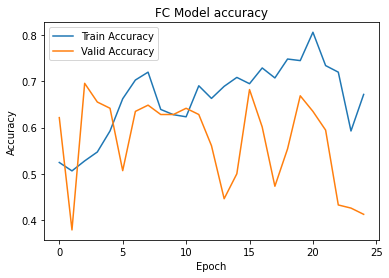

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("FC Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()  #it's necessary, to make prediction start with the first batch. Because the index is on the end of queue due to fit function 
preds = modelfc.predict(validation_generator,verbose=1)

8/8 [==============================] - 1s 71ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

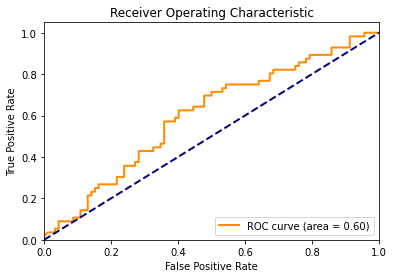

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between dandelions and grass. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, dandelions and grass. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using Convolutional Neural Networks and transfer learning with ResNet!

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = modelfc.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")
 

## Building the CNN Model from Scratch
**Tips:** 

- First, add the first layer as conv2d of 16 filters of 3x3 size, and activation relu
-  Second layer: MaxPooling2D layer 
- repeat this block of layers, increasing number of filters (32, 64), following each time by a MaxPooling2D layer 
- add a flatten layer to prepare 2D feature maps to be ready for FC layer 
- add a Dense layer with 512 units
- Finally, add a Dense layer with **x units ???**




In [ ]:
modelcnn = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
modelcnn.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
metrics='accuracy')

In [ ]:
history = modelcnn.fit(train_generator,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = validation_generator,
validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 486ms/step - loss: 1.0535 - accuracy: 0.5256 - val_loss: 0.6878 - val_accuracy: 0.5676
Epoch 2/15
8/8 [==============================] - 3s 362ms/step - loss: 0.7175 - accuracy: 0.5609 - val_loss: 0.6609 - val_accuracy: 0.6216
Epoch 3/15
8/8 [==============================] - 2s 301ms/step - loss: 0.6906 - accuracy: 0.5518 - val_loss: 0.6764 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 2s 302ms/step - loss: 0.7687 - accuracy: 0.5461 - val_loss: 0.7174 - val_accuracy: 0.3784
Epoch 5/15
8/8 [==============================] - 2s 302ms/step - loss: 0.6832 - accuracy: 0.5825 - val_loss: 0.6820 - val_accuracy: 0.6014
Epoch 6/15
8/8 [==============================] - 2s 314ms/step - loss: 0.6753 - accuracy: 0.6189 - val_loss: 0.6629 - val_accuracy: 0.6284
Epoch 7/15
8/8 [==============================] - 2s 296ms/step - loss: 0.7087 - accuracy: 0.5597 - val_loss: 0.6741 - val_accuracy: 0.7297
Epoch 8/15
8/8 [===

### Evaluation of Model: Accuracy, ROC Curve, and AUC





In [ ]:
modelcnn.evaluate(validation_generator)

8/8 [==============================] - 1s 69ms/step - loss: 0.5081 - accuracy: 0.7365


[0.5080677270889282, 0.7364864945411682]

**Exercise**

Plot the oart of loss curve for train and validation data

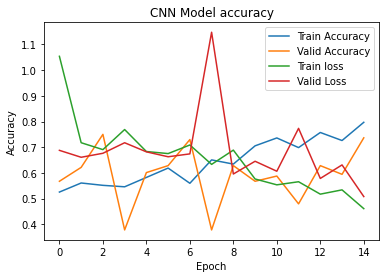

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("CNN Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds2 = modelcnn.predict(validation_generator,
                      verbose=1)



8/8 [==============================] - 1s 69ms/step


In [ ]:
fpr_cnn, tpr_cnn, _ = roc_curve(validation_generator.classes, preds2)

In [ ]:
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

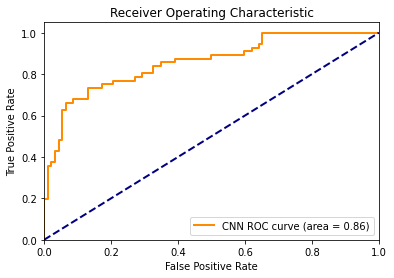

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = modelcnn.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")
 

### **Compare two Models**


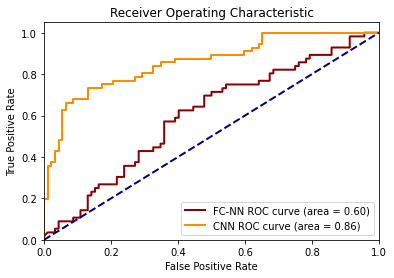

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='FC-NN ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




## **Transfer Learning**

**MobileNet-v2** is a convolutional neural network that is 53 deep layers . You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224. For more pretrained networks, for Image Classification, those are the top 4 pre-trained - Models
- VGG-16
- ResNet50
- Inceptionv3
- EfficientNet



In [ ]:


#import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
#import numpy as np
#from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [ ]:
model_tl = Sequential()
model_tl.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200,200,3)))
model_tl.add(tf.keras.layers.GlobalAveragePooling2D())
model_tl.add(Dense(1, activation = 'sigmoid'))
model_tl.layers[0].trainable = False

**Note** that when loading the basic model, the “**include_top**” argument can be set to False, in this case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.

Additionally, when the “**include_top**” argument is False, the “input_tensor” argument can be changed to specify a new input shape, as in our case 200, where the originl model has 224, that allowing the expected fixed-sized input of the model to be changed

In [ ]:
model_tl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras import optimizers


model_tl.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model_tl.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 558ms/step - loss: 0.9170 - accuracy: 0.7452 - val_loss: 0.5435 - val_accuracy: 0.7568
Epoch 2/15
8/8 [==============================] - 3s 420ms/step - loss: 0.2628 - accuracy: 0.8919 - val_loss: 0.6308 - val_accuracy: 0.7568
Epoch 3/15
8/8 [==============================] - 3s 316ms/step - loss: 0.2005 - accuracy: 0.9226 - val_loss: 0.3597 - val_accuracy: 0.8446
Epoch 4/15
8/8 [==============================] - 3s 316ms/step - loss: 0.2370 - accuracy: 0.9067 - val_loss: 0.3415 - val_accuracy: 0.8649
Epoch 5/15
8/8 [==============================] - 3s 319ms/step - loss: 0.1050 - accuracy: 0.9602 - val_loss: 0.2533 - val_accuracy: 0.8919
Epoch 6/15
8/8 [==============================] - 3s 328ms/step - loss: 0.0725 - accuracy: 0.9771 - val_loss: 0.2135 - val_accuracy: 0.9122
Epoch 7/15
8/8 [==============================] - 3s 313ms/step - loss: 0.2811 - accuracy: 0.9067 - val_loss: 0.2360 - val_accuracy: 0.9122
Epoch 8/15
8/8 [====

### Evaluation of Model: Accuracy, ROC Curve, and AUC

In [ ]:
model_tl.evaluate(validation_generator)

8/8 [==============================] - 1s 77ms/step - loss: 0.2601 - accuracy: 0.9122


[0.2600855827331543, 0.912162184715271]

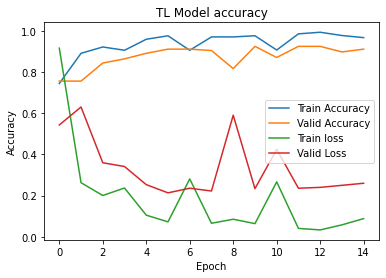

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("TL Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds3 = model_tl.predict(validation_generator,
                      verbose=1)


8/8 [==============================] - 1s 76ms/step


In [ ]:
model_tl.evaluate(validation_generator,
                      verbose=1)


8/8 [==============================] - 1s 79ms/step - loss: 0.2601 - accuracy: 0.9122


[0.2600855827331543, 0.912162184715271]

In [ ]:
fpr_tl, tpr_tl, _ = roc_curve(validation_generator.classes, preds3)

In [ ]:
roc_auc_tl = auc(fpr_tl, tpr_tl)

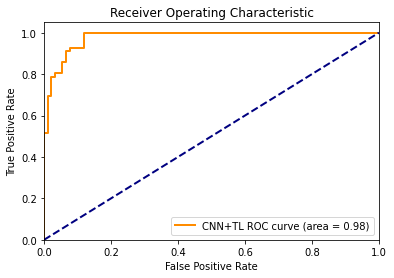

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_tl, tpr_tl, color='darkorange',
         lw=lw, label='CNN+TL ROC curve (area = %0.2f)' % roc_auc_tl)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Assignment 1
Try to transfer learning from ResNet50, MobileNetV2 networks to perform the same task of classification

- compare between the three architectures, showing the performances, and the complexity
- Which model would you choose for your system ? argument you choice 

In [ ]:
model_tl2 = Sequential()
model_tl2.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200,200,3)))
model_tl2.add(tf.keras.layers.GlobalAveragePooling2D())
model_tl2.add(Dense(1, activation = 'sigmoid'))
model_tl2.layers[0].trainable = False
model_tl2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Training 2nd Model of transfer learning ResNet50

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras import optimizers


model_tl2.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model_tl2.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 5s 316ms/step - loss: 1.4985 - accuracy: 0.7133 - val_loss: 0.8007 - val_accuracy: 0.6824
Epoch 2/15
8/8 [==============================] - 3s 311ms/step - loss: 0.2148 - accuracy: 0.9135 - val_loss: 0.3978 - val_accuracy: 0.8243
Epoch 3/15
8/8 [==============================] - 3s 310ms/step - loss: 0.2777 - accuracy: 0.8771 - val_loss: 0.3461 - val_accuracy: 0.8851
Epoch 4/15
8/8 [==============================] - 3s 314ms/step - loss: 0.1446 - accuracy: 0.9397 - val_loss: 0.6403 - val_accuracy: 0.7568
Epoch 5/15
8/8 [==============================] - 2s 308ms/step - loss: 0.3275 - accuracy: 0.8783 - val_loss: 0.2623 - val_accuracy: 0.9122
Epoch 6/15
8/8 [==============================] - 3s 316ms/step - loss: 0.0830 - accuracy: 0.9659 - val_loss: 0.3126 - val_accuracy: 0.8986
Epoch 7/15
8/8 [==============================] - 3s 310ms/step - loss: 0.1054 - accuracy: 0.9579 - val_loss: 0.2515 - val_accuracy: 0.9189
Epoch 8/15
8/8 [====

In [ ]:
model_tl2.evaluate(validation_generator)

8/8 [==============================] - 1s 76ms/step - loss: 0.2181 - accuracy: 0.9054


[0.21809051930904388, 0.9054054021835327]

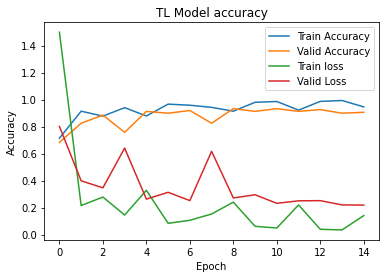

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("TL Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds4 = model_tl2.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 1s 78ms/step


### Assignment 2: **Compare the performances o three Models**

- Now, you have to compare between three models: FC-NN, CNN, TL(winning one)
- show your interpretation of results and justify your choice  


* share me your notebook via my address mymehio@gmail.com
Deadline: 09/12/2022 11:59 pm


In [ ]:
# transfer model
TL, tpr, _ = roc_curve(validation_generator.classes, preds4)
roc_auc_TL = auc(TL, tpr)

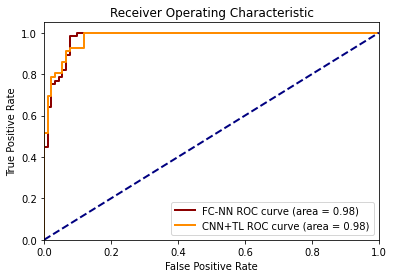

In [ ]:
plt.figure()
lw = 2
plt.plot(TL, tpr, color='darkred',
         lw=lw, label='FC-NN ROC curve (area = %0.2f)' % roc_auc_TL)
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='FC-NN ROC curve (area = %0.2f)' % roc_auc)
'''plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)'''
plt.plot(fpr_tl, tpr_tl, color='darkorange',
         lw=lw, label='CNN+TL ROC curve (area = %0.2f)' % roc_auc_tl)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Clean Up
Run the following cell to terminate the kernel and free memory resources: 

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)